In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

pos = nx.spring_layout(model.G)


for j in range(700):
    model.step()

In [5]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(624, level="Step")
agent_data #['current_crop'].value_counts().sum

,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
AgentID,,,,,,,,,
1,"[0, 26, 28, 30, 32, 33, 55, 58, 60, 61]",8.642685,145236.638136,0,8872.884120,1733.782148,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Mango,Mango
2,"[17, 22, 45, 48, 53]",8.195854,288408.424815,0,15183.630372,3164.273280,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Mango,Mango
3,"[20, 21, 26, 30, 33, 53, 54, 57, 59]",9.476461,69323.738524,0,5386.859382,650.643567,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Mango,Mango
4,"[0, 25, 49, 50, 55, 56]",8.720423,106494.356322,0,6727.928684,1176.197764,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Mango,Mango
5,"[32, 34, 54]",8.790700,117573.141040,0,7383.625798,1377.905943,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Mango,Mango
...,...,...,...,...,...,...,...,...,...
396,"[2, 3, 5, 7, 29, 52]",8.362321,59377.152991,0,8134.970264,2281.159105,"[{'strategy': 'Coconut', 'FA': 1, 'IA': 0.8888...",Coconut,Coconut
397,[],8.382589,9051.597987,0,2584.520588,356.715913,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Coconut,Coconut
398,"[23, 43, 47, 70, 71]",8.614346,65082.884981,0,9614.748979,2726.892595,"[{'strategy': 'Mango', 'FA': 1, 'IA': 1, 'TA':...",Coconut,Coconut


### PLOT AGENTS ON THE MAP

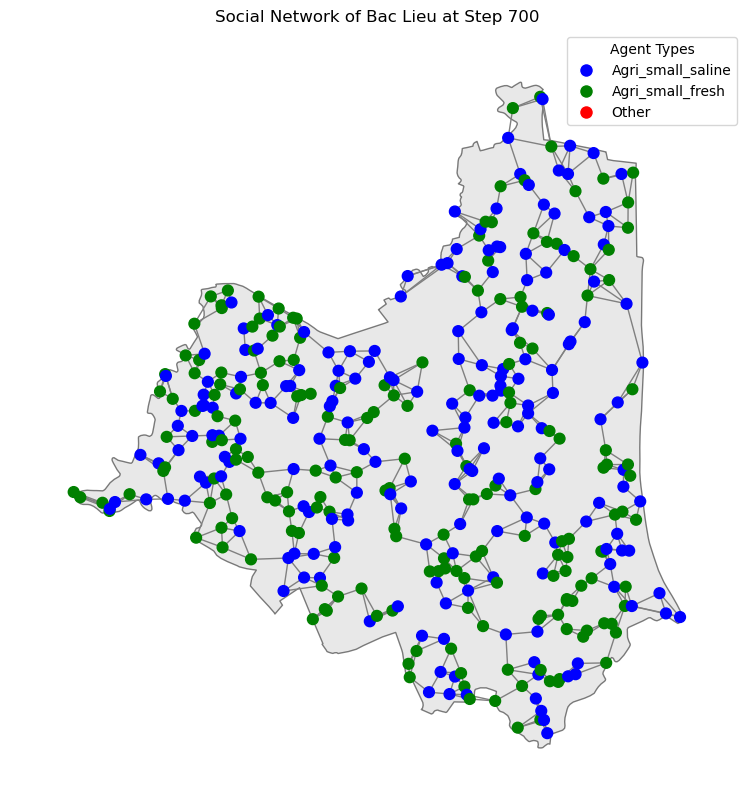

In [4]:
import matplotlib.lines as mlines

def plot_network(ax, model):
    ax.clear()

    # Plot province map
    model.polygon.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes and make a dictionary with the nodes and agents
    pos = nx.get_node_attributes(model.G, 'pos')

    node_to_agent = {}
    for agent in model.agents:
        node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.agent_type == "Agri_small_saline":
                colors.append('blue')
            elif agent.agent_type == "Agri_small_fresh":
                colors.append('green')
            else:
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Agri_small_saline')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Agri_small_fresh')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Other')
    ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    nx.draw(model.G, pos, node_color=colors, node_size=60, edge_color="gray", ax=ax)
    ax.set_title(f"Social Network of {model.province} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()
